In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
iris_data=pd.read_csv('C:/Users/manar/Downloads/Datasets/iris_csv.csv')

In [4]:
iris_data.head(10)

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Exploratory Data Analysis

In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
iris_data.nunique()

sepallength    35
sepalwidth     23
petallength    43
petalwidth     22
class           3
dtype: int64

In [9]:
iris_data.duplicated().sum()

3

In [10]:
iris_data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [11]:
#check for missing values
iris_data.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

# check the correlation between the features

In [12]:
corr=iris_data.corr()

<AxesSubplot:>

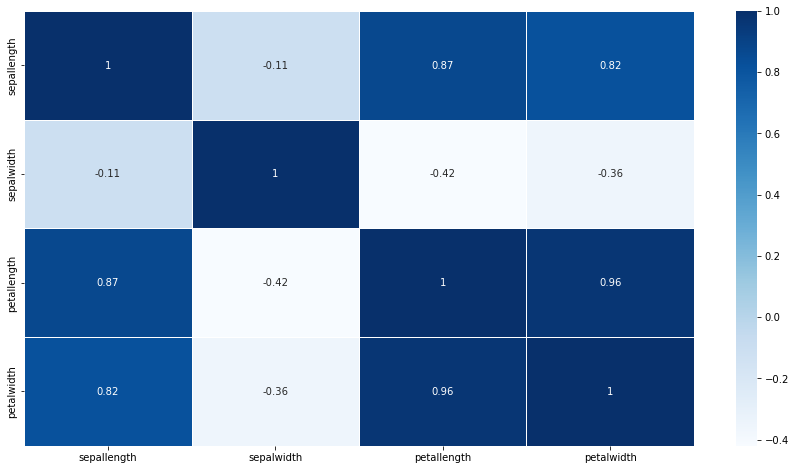

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap = 'Blues', linecolor = 'white', linewidth = 1, annot=True)

<AxesSubplot:xlabel='sepalwidth', ylabel='sepallength'>

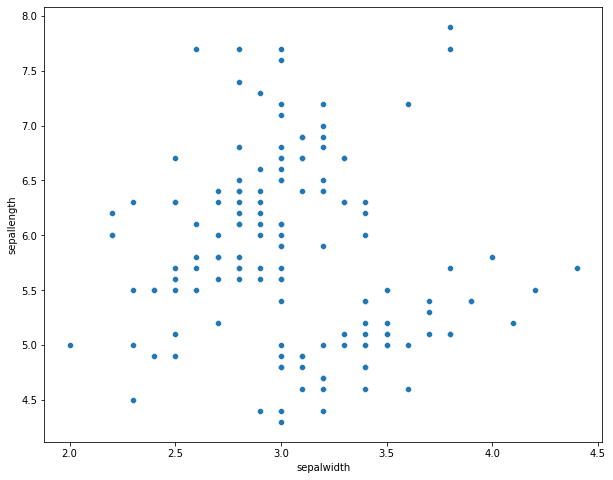

In [14]:
#the realation between spealwidth and petalwidth
plt.figure(figsize=(10,8))
sns.scatterplot(data=iris_data, x='sepalwidth', y='sepallength')

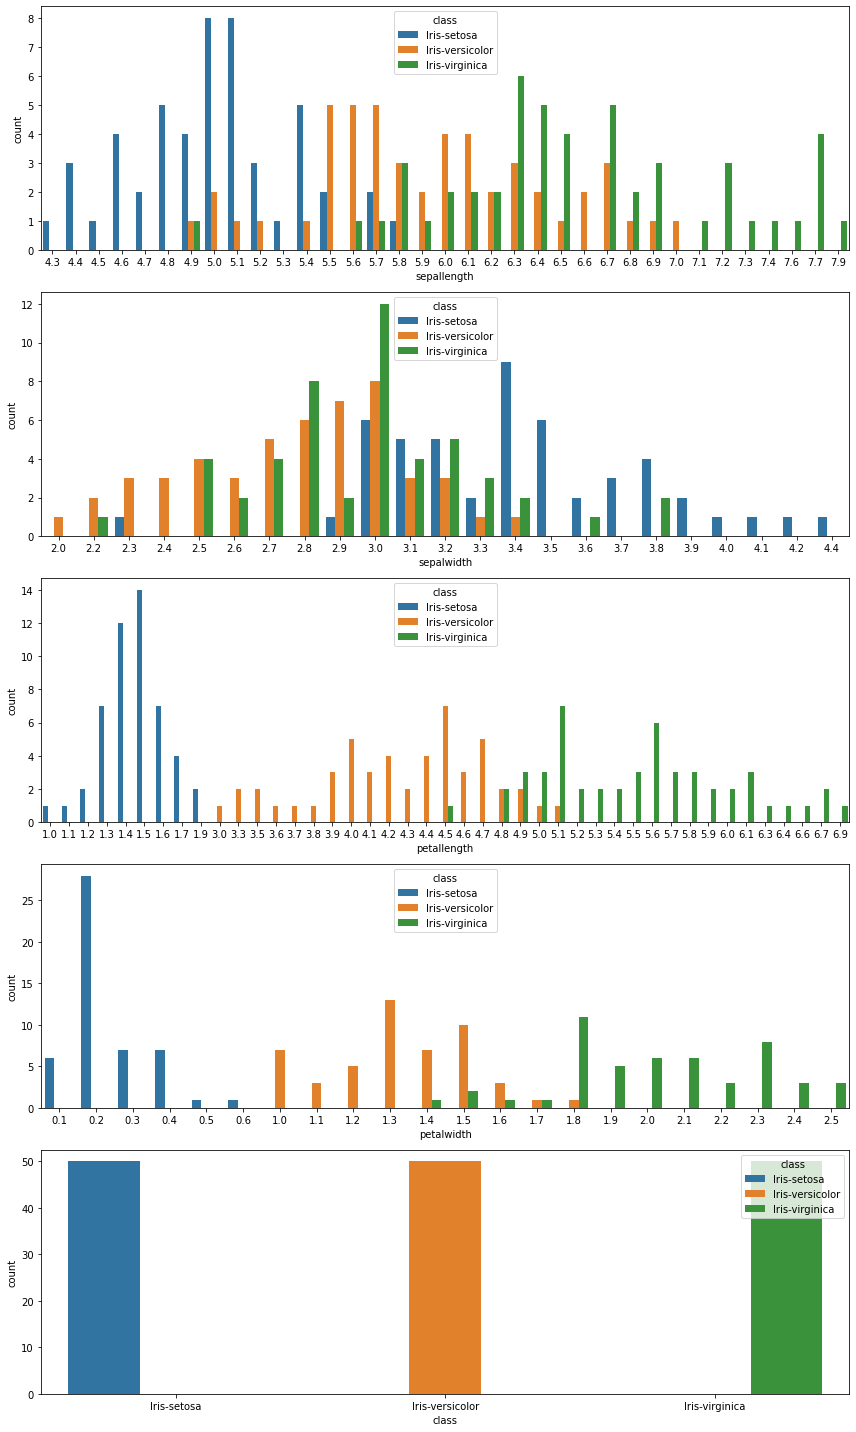

In [15]:
#check the relation between each feature with target
features=[]
for col in iris_data.columns:
    features.append(col)
#fig,axes=plt.subplots(nrows=len(features),ncols=(10,4*len(features)))
fig, axes = plt.subplots(nrows=len(features), ncols=1,figsize=(12,4*len(features)))
for i, feature in enumerate(features):
    sns.countplot(x=iris_data[feature],hue=iris_data['class'] ,ax=axes[i])
plt.tight_layout()
plt.show()

In [16]:
#Encode the categorical features
iris_data.replace({'class': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}}, inplace=True)

# split the features and target

In [17]:
X=iris_data.drop(['class'],axis=1)
Y=iris_data['class']

In [18]:
#split the training and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print(X.shape,x_train.shape,x_test.shape)

(150, 4) (120, 4) (30, 4)


# Build Logistic Regression

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluate the model

In [21]:
train=model.predict(x_test)
score=accuracy_score(y_test,train)
print("the accuracy is :",score)

the accuracy is : 0.9666666666666667


# Create Confusion Matrix

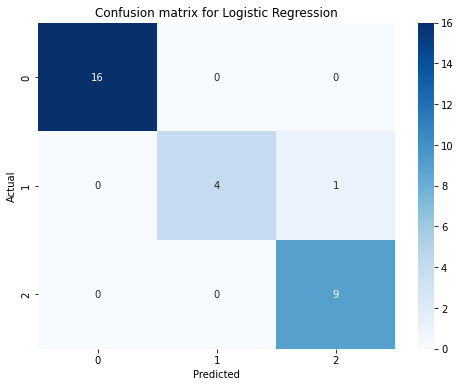

In [22]:
cm = confusion_matrix(y_test, train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

In [23]:
#get the score using classification report
print(classification_report(y_test,train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

